# Decision Tree Approach

Use Decision Tree approach to analyze data. I use happy or unhappy as label in this attempt. Happy person will be the upper XXth percentile, while unhappy person will be bottom XXth percentile.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
rawdata = pd.read_excel("dEX Team Survey.xlsx") 

In [29]:
rawdata.head()

,ID,Start time,Completion time,Email,Name,How happy are you at work?,How likely are you to recommend your friend or colleague to work here?,Do you feel you are driving value for GC?,Do you feel like dEX team members give each other respect?,How frequently do you receive feedback/recognition from your team leaders?,...,How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,How comfortable are you to openly consult both your professional and personal issues with dEX team members?,Are you fully empowered and accountable for the work that you do?,Do you have the right capabilities and skillets to reach your full potential?,Are you satisfy with level of comfort in your physical work space?,Do you feel that you maintain a healthy balance between your work and personal life?,"Hypothetically, if you were to quit tomorrow, what would your reason be? (Please select one)",Total Score
0,1,2019-06-05 15:17:38,2019-06-05 15:20:47,anonymous,NaN,8,5,7,9,8,...,8,4,9,10,8,9,9,5,Team leaders (VP & DM),109
1,2,2019-06-05 15:22:08,2019-06-05 15:24:30,anonymous,NaN,7,7,7,6,5,...,8,8,7,8,8,9,9,8,Need to get more challenge,104
2,3,2019-06-05 15:26:55,2019-06-05 15:30:23,anonymous,NaN,7,7,8,8,8,...,6,7,8,8,9,7,6,7,Colleagues,103
3,4,2019-06-05 15:40:57,2019-06-05 15:44:18,anonymous,NaN,3,7,5,7,8,...,6,8,3,3,4,3,4,3,Job responsibility,72
4,5,2019-06-05 15:03:34,2019-06-05 15:55:58,anonymous,NaN,4,0,2,2,5,...,3,7,1,0,10,4,0,0,Team leaders (VP & DM),40


### Data Wrangling

In [30]:
data = rawdata.drop(["ID","Start time", "Completion time", "Email","Name",'Hypothetically, if you were to quit tomorrow, what would your reason be? (Please select one)'], axis=1)

In [31]:
data.head()

,How happy are you at work?,How likely are you to recommend your friend or colleague to work here?,Do you feel you are driving value for GC?,Do you feel like dEX team members give each other respect?,How frequently do you receive feedback/recognition from your team leaders?,Do you feel your team leaders are someone you can trust?,How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,How comfortable are you to openly consult both your professional and personal issues with dEX team members?,Are you fully empowered and accountable for the work that you do?,Do you have the right capabilities and skillets to reach your full potential?,Are you satisfy with level of comfort in your physical work space?,Do you feel that you maintain a healthy balance between your work and personal life?,Total Score
0,8,5,7,9,8,10,8,4,9,10,8,9,9,5,109
1,7,7,7,6,5,7,8,8,7,8,8,9,9,8,104
2,7,7,8,8,8,7,6,7,8,8,9,7,6,7,103
3,3,7,5,7,8,8,6,8,3,3,4,3,4,3,72
4,4,0,2,2,5,2,3,7,1,0,10,4,0,0,40


In [32]:
data['Do you feel your team leaders are someone you can trust?'].describe()

count    22.000000
mean      7.045455
std       2.609092
min       1.000000
25%       7.000000
50%       8.000000
75%       8.750000
max      10.000000
Name: Do you feel your team leaders are someone you can trust?, dtype: float64

In [33]:
p = np.percentile(data['Do you feel your team leaders are someone you can trust?'], 100/3) 
print(p)

7.0


In [34]:
data['Happy or Not'] = data['Do you feel your team leaders are someone you can trust?']>6.9

In [35]:
data.head()

,How happy are you at work?,How likely are you to recommend your friend or colleague to work here?,Do you feel you are driving value for GC?,Do you feel like dEX team members give each other respect?,How frequently do you receive feedback/recognition from your team leaders?,Do you feel your team leaders are someone you can trust?,How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team,Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?,How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?,How comfortable are you to openly consult both your professional and personal issues with dEX team members?,Are you fully empowered and accountable for the work that you do?,Do you have the right capabilities and skillets to reach your full potential?,Are you satisfy with level of comfort in your physical work space?,Do you feel that you maintain a healthy balance between your work and personal life?,Total Score,Happy or Not
0,8,5,7,9,8,10,8,4,9,10,8,9,9,5,109,True
1,7,7,7,6,5,7,8,8,7,8,8,9,9,8,104,True
2,7,7,8,8,8,7,6,7,8,8,9,7,6,7,103,True
3,3,7,5,7,8,8,6,8,3,3,4,3,4,3,72,True
4,4,0,2,2,5,2,3,7,1,0,10,4,0,0,40,False


### Machine Learning

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


In [38]:
features = list(data.drop(['How happy are you at work?','Do you feel your team leaders are someone you can trust?','Total Score','Happy or Not'],axis=1).columns[:])
print(len(features))
classname = ['Not Trust','Trust']
features

12


['How likely are you to recommend your friend or colleague to work here?',
 'Do you feel you are driving value for GC?',
 'Do you feel like dEX team members give each other respect?',
 'How frequently do you receive feedback/recognition from your team leaders?',
 'How comfortable do you feel giving feedback to your colleagues OUTSIDE of dEX team',
 'Do you and your colleagues OUTSIDE of dEX team work to achieve the same goals?',
 'How comfortable do you feel giving feedback to your colleagues WITHIN dEX team?',
 'How comfortable are you to openly consult both your professional and personal issues with dEX team members?',
 'Are you fully empowered and accountable for the work that you do?',
 'Do you have the right capabilities and skillets to reach your full potential?',
 'Are you satisfy with level of comfort in your physical work space?',
 'Do you feel that you maintain a healthy balance between your work and personal life?']

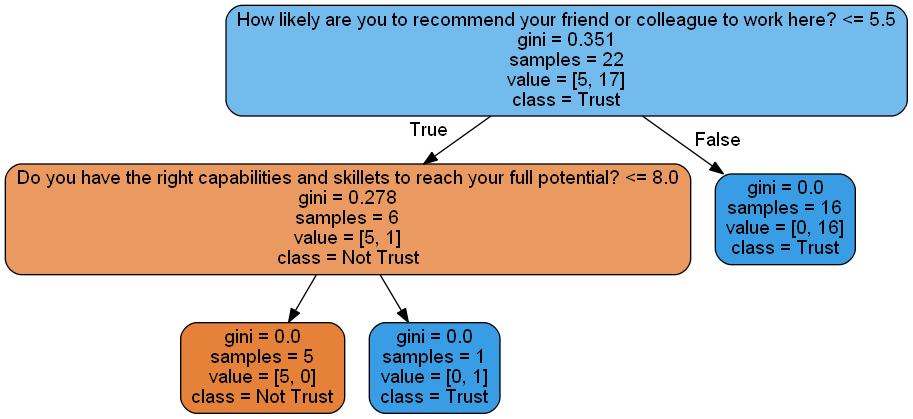

In [39]:
dot_data = StringIO()  
XX = data.drop(['How happy are you at work?','Do you feel your team leaders are someone you can trust?','Total Score','Happy or Not'],axis=1)
yy = data['Happy or Not']


dtree1 = DecisionTreeClassifier()
dtree1.fit(XX,yy)

export_graphviz(dtree1,class_names=classname, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  